<a href="https://colab.research.google.com/github/zaccowan/MLA_ZSC/blob/main/SenakeeEDA/Cherokee_Seneca_2022_2024_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

# Read Excel File from Github Repo

In [10]:
import requests
import pandas as pd

url = "https://github.com/zaccowan/MLA_ZSC/raw/refs/heads/main/SenakeeEDA/Senakee_Invasive.xlsx"

response = requests.get(url)

dest = 'local-file.xlsx'

with open(dest, 'wb') as file:
    file.write(response.content)

senakee2024 = pd.read_excel(dest, sheet_name=0, header=1)
senakee2022 = pd.read_excel(dest, sheet_name=1, header=1)

In [11]:
senakee2024.head()

,Comment,Description,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM
0,Cherokee1,New trail goes thru buffer edge,12.0,3.0,5.0,7.0,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",...,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20
1,Cherokee2,By trail amd dog run fence,3.0,0.0,2.0,2.0,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",...,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15
2,Cherokee3,"Close to interstate fence, looks like foliage ...",1.0,0.0,4.0,5.0,2.60,97.40,"Oak, basswood, maple","Maple, ash",...,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10
3,Cherokee4,Narrow spit between roads and creek,13.0,3.0,4.0,6.0,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",...,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19
4,Cherokee5,Mature LOMA with fruit above parking lot,15.0,12.0,3.0,20.0,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",...,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7


In [12]:
senakee2022.head()

,Comment,Description,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM
0,Cherokee1,On trail in narrow edge,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",...,3,0,0,0,1,3,0.0,0.0,1.0,16
1,Cherokee2,By trail amd dog run fence,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",...,4,0,0,0,2,1,0.0,0.0,0.0,8
2,Cherokee3,"Close to interstate fence, looks like foliage ...",10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",...,4,0,0,0,2,1,0.0,0.0,0.0,8
3,Cherokee4,Narrow spit between roads and creek.,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",...,3,0,0,0,3,3,0.0,0.0,0.0,13
4,Cherokee5,Mature LOMA with fruit above parking lot,25,23,30,22.0,26.00,74.00,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,...,3,0,0,1,1,3,0.0,0.0,0.0,15


# Column Names

Isolating Columns that deal only with the invasive species counts.

In [ ]:
species_cols = senakee2024.columns[10:24]
species_cols

Index(['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum'],
      dtype='object')

# Spliting data into Cherokee and Senca

In [ ]:
cherokee2024 = senakee2024[0:173]
cherokee2024.tail()

,Comment,Description,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM
168,Cherokee169,NaN,14.0,5.0,12.0,5.0,9.36,90.64,"Hackberry, walnut, basswood","Redbud, box elder, serviceberry, pawpaw",...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8
169,Cherokee170,Pyrus sp (3),30.0,26.0,28.0,35.0,30.94,69.06,"Willow oak, chestnut oak, elm, hickory, maple,...","Redbud, cedar, ash,",...,3.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,8
170,Cherokee171,"Rhamnus cathartica (2), helleborine orchid sp ...",31.0,12.0,35.0,16.0,24.44,75.56,"Oaks: chestnut, red, white, maple, walnut, hac...","Maple, redbud, ash, cedar,",...,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9
171,Cherokee172,Tall steep slopes over creek,20.0,80.0,16.0,26.0,36.92,63.08,"Chestnut oaks, hickory, walnut, maple, red oak,","Redbud, ash, hickory, hackberry,",...,5.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,18
172,Cherokee173,Steep hillside,6.0,18.0,35.0,12.0,18.46,81.54,"Maple, hickory, red oak, tulip poplar,","Hackberry, elderberry, hickory, oak",...,5.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,17


In [ ]:
cherokee2022 = senakee2022[0:164]
cherokee2022.tail()

,Comment,Description,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM
159,Cherokee169,NaN,38,5,25,4.0,18.72,81.28,"Ash, oak, butternut hickory, sugar maple, buck...","Buckeye, cercis, black cherry, dogwood, junipe...",...,4,0,0,0,2,4,0.0,0.0,1.0,13
160,Cherokee170,Pyrus sp (3),21,39,44,19.0,31.98,68.02,"Osageorange, chinkapin oak, ash, tilia, sugar ...","Hackberry, cercis, ash, oak, maple, juniper, elm",...,0,0,0,0,0,4,0.0,1.0,1.0,8
161,Cherokee171,"Rhamnus cathartica (2), helleborine orchid sp ...",28,9,26,34.0,25.22,74.78,"Oak sp, ash, sycamore","Sugar maple, ash, juniper, cercis, butternut h...",...,4,0,0,0,0,2,2.0,0.0,2.0,14
162,Cherokee172,NaN,29,39,7,11.0,22.36,77.64,"Ailanthus, cercis, buckeye, sugar maple, Cornu...","Bladdernut, juniper, lonicera, ash",...,3,0,0,0,0,4,0.0,2.0,1.0,15
163,Cherokee173,Garlic mustard (1),10,36,8,7.0,15.86,84.14,"Mulberry, elm,maple","Walnut, red oak,box elder, carya sp, ash, mulb...",...,3,0,0,0,1,2,1.0,0.0,2.0,19


In [ ]:
seneca2024 = senakee2024.drop(senakee2024.index[0:173])
seneca2024.head()

,Comment,Description,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM
173,Seneca1,By HUGE cherry tree,5.0,8.0,3.0,4.0,5.20,94.80,"Cherry, hickory, maple","Hackberry, viburnum, locust",...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,7
174,Seneca2,Pretty much in their back yard,1.0,0.0,0.0,0.0,0.26,99.74,"Maple, cherry, ash","Ash,redbud",...,4.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,11
175,Seneca3,"Big dead cherry, beauty berry present, 5-leaf ...",9.0,7.0,2.0,2.0,5.20,94.80,"Oak, cherry, hackberry","Redbud, ash",...,4.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,9
176,Seneca4,Few beautyberrys,7.0,3.0,1.0,11.0,5.72,94.28,"Hackberry, walnut, maple, hackberry","Beautyberry,",...,4.0,0.0,0.0,2.0,0.0,3.0,2.0,0.0,0.0,15
177,Seneca5,Near house fence,3.0,3.0,4.0,0.0,2.60,97.40,"Hackberry, walnut, maple, hackberry","Buckeye, honeysuckle",...,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,10


In [ ]:
seneca2022 = senakee2022.drop(senakee2022.index[0:164])
seneca2022.head()

,Comment,Description,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,...,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM
164,Seneca1,By HUGE cherry tree,7,7,7,12.0,8.58,91.42,"Cherry, walnut, red oak, hackberry, sugar maple","Box elder, sugar maple, hackberry, ash",...,4,0,0,0,0,4,0.0,0.0,0.0,9
165,Seneca2,Pretty much in their back yard,4,0,0,0.0,1.04,98.96,"Walnut, hackberry, cherry, ash","Redbud, ash, mulberry, elderberry",...,4,0,0,0,4,4,0.0,0.0,0.0,15
166,Seneca3,"Big dead cherry, beauty berry present, 5-leaf ...",5,12,9,8.0,8.84,91.16,"Hackberry, red oak, sugar maple","Black locust, ginkgo, ash, redbud",...,4,0,0,0,0,3,0.0,0.0,0.0,11
167,Seneca4,NaN,2,2,4,4.0,3.12,96.88,"Walnut, hackberry, sycamore,","Sugar maple, box elder, hackberry",...,4,0,0,0,0,2,0.0,0.0,0.0,10
168,Seneca5,Near house fence,7,7,10,2.0,6.76,93.24,"Walnut, hackberry, red mulberry, box elder","Buckeye, box elder",...,4,0,0,0,0,3,1.0,0.0,0.0,15


# Count Plots

<ipython-input-12-40f1160b634c>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

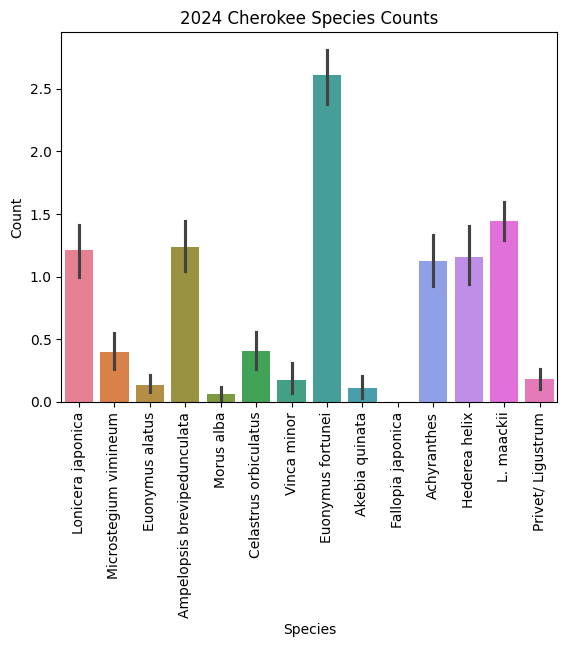

In [ ]:
sns.barplot(cherokee2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Cherokee Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')


<ipython-input-13-fd8c839c370b>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

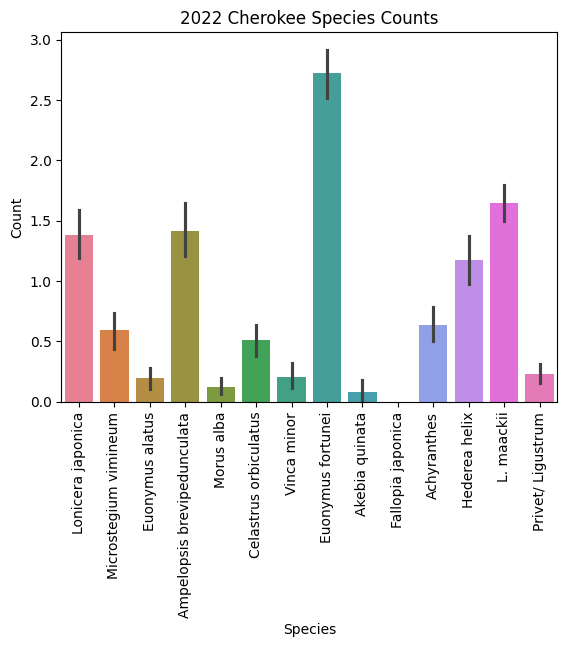

In [ ]:
sns.barplot(cherokee2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Cherokee Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

<ipython-input-14-fdfd02a745b9>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

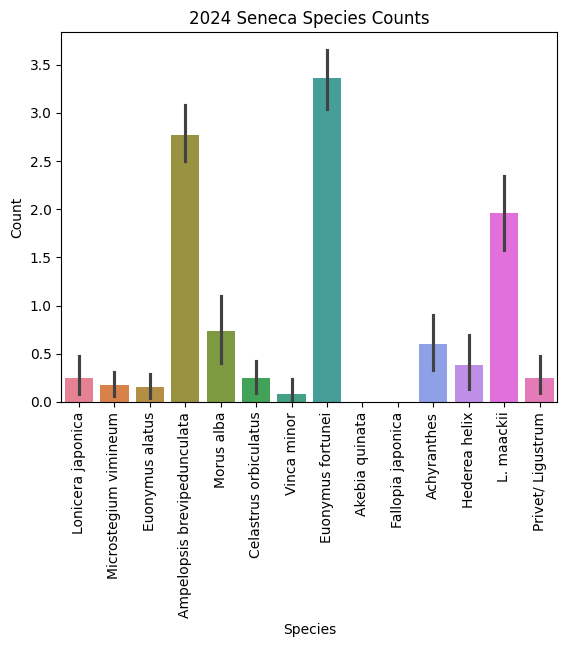

In [ ]:
sns.barplot(seneca2024[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2024 Seneca Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

<ipython-input-73-ba13a66daa87>:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)


Text(0, 0.5, 'Count')

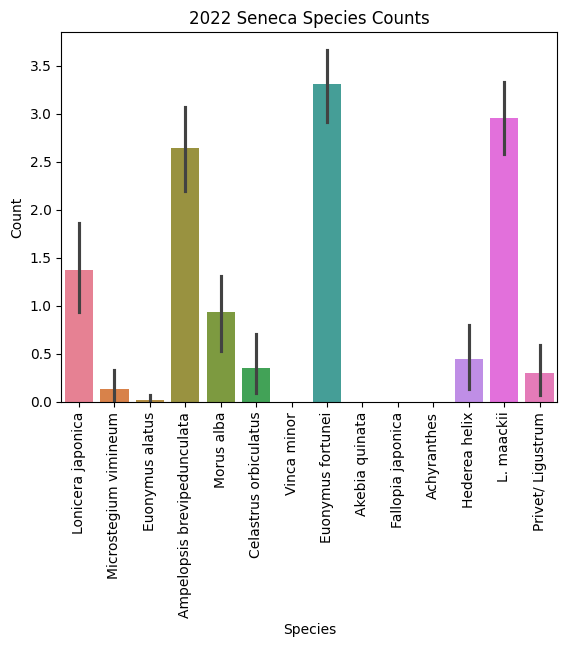

In [ ]:
sns.barplot(seneca2022[species_cols]).set_xticklabels(labels=species_cols, rotation=90)
plt.title('2022 Seneca Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')

In [ ]:
cherokee2024[species_cols].mean

,0
Lonicera japonica,1.210884
Microstegium vimineum,0.401361
Euonymus alatus,0.136054
Ampelopsis brevipedunculata,1.238095
Morus alba,0.061224
Celastrus orbiculatus,0.408163
Vinca minor,0.176871
Euonymus fortunei,2.612245
Akebia quinata,0.108844
Fallopia japonica,0.000000


In [ ]:
cherokee2024[species_cols].mean()

,0
Lonicera japonica,1.210884
Microstegium vimineum,0.401361
Euonymus alatus,0.136054
Ampelopsis brevipedunculata,1.238095
Morus alba,0.061224
Celastrus orbiculatus,0.408163
Vinca minor,0.176871
Euonymus fortunei,2.612245
Akebia quinata,0.108844
Fallopia japonica,0.000000


Text(0.5, 1.0, '2022 Species Correlation')

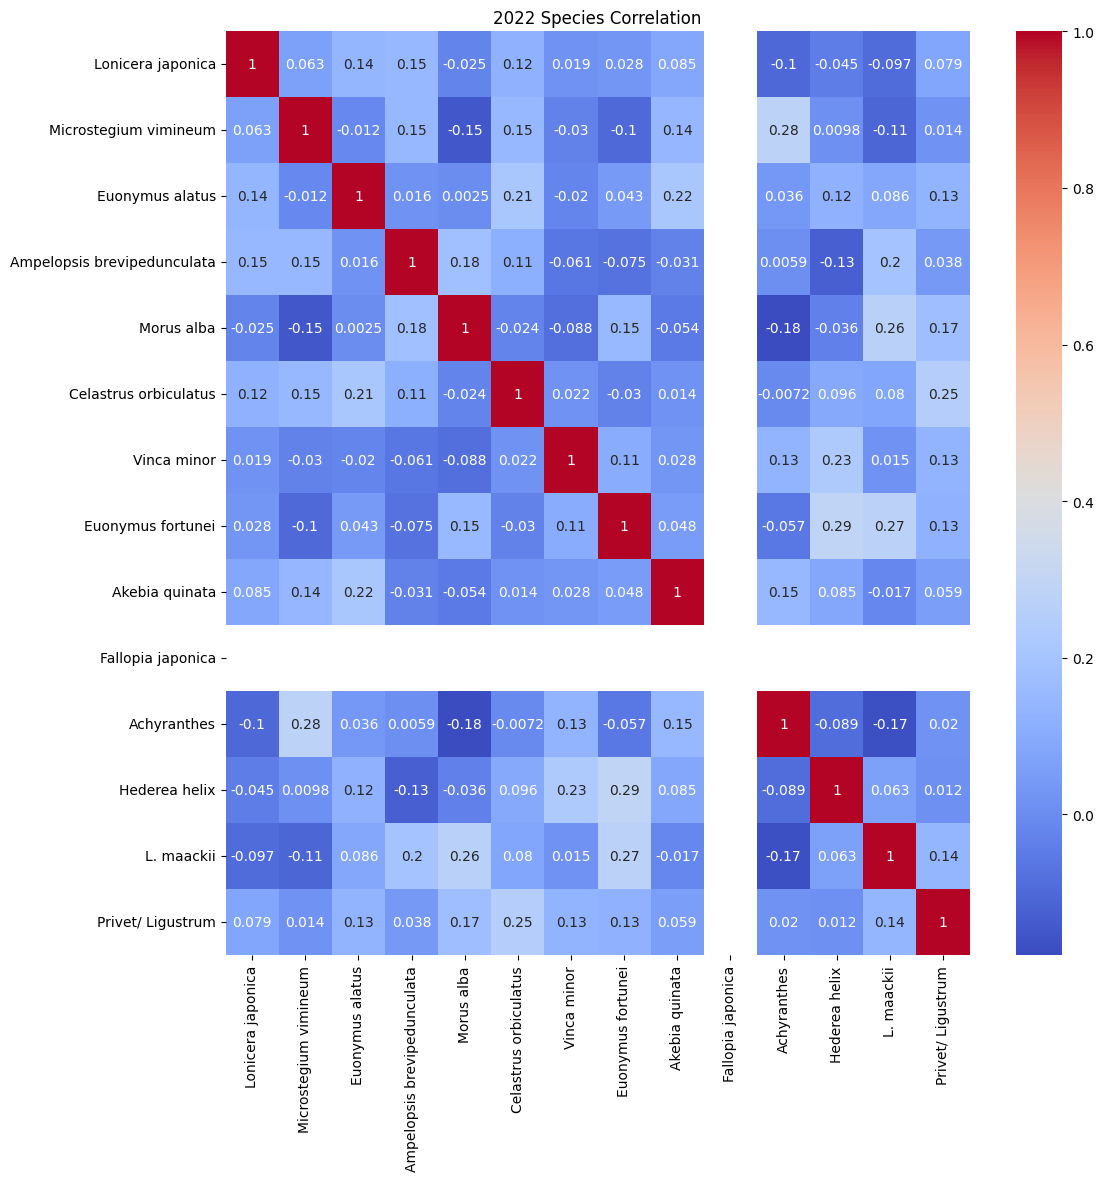

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(senakee2022[species_cols].corr(), annot=True, cmap='coolwarm')
plt.title('2022 Species Correlation')